<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://www.redage.org/sites/default/files/styles/large/public/img-logo-institucion/logo_iteso.jpg?itok=IzloBJS1" style="width:500px;height:142px;" title="Logo ITESO"></center>

<font face = "Times New Roman" size = "6"><b><center>Programacion para Mineria de Datos</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>RandomForest</center></b></font>

<font face = "Times New Roman" size = "5"><b><center>Proyecto Final</center></b></font>
<div align="right"><font face = "Times New Roman" size = "2">nombres: Angel Aceves Manzo</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jorge Arturo Ponce Martin</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jesus Vargas Pacheco</font></div>
</span></div>

In [8]:
import json
import pandas as pd
import numpy as np
import joblib
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

train = pd.read_csv("../01_preprocessing_results/preprocessing/T_train_final_objetivo.csv")
test = pd.read_csv("../01_preprocessing_results/preprocessing/T_test_final_objetivo.csv")

print(train.columns.tolist())

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'Gender___female', 'Gender___male', 'Gender___other', 'City___adana', 'City___ankara', 'City___antalya', 'City___bursa', 'City___eskisehir', 'City___gaziantep', 'City___istanbul', 'City___izmir', 'City___kayseri', 'City___konya', 'Product_Category___beauty', 'Product_Category___books', 'Product_Category___electronics', 'Product_Category___fashion', 'Product_Category___food', 'Product_Category___home & garden', 'Product_Category___sports', 'Product_Category___toys', 'Payment_Method___bank transfer', 'Payment_Method___cash on delivery', 'Payment_Method___credit card', 'Payment_Method___debit card', 'Payment_Method___digital wallet', 'Device_Type___desktop', 'Device_Type___mobile', 'Device_Type___tablet', 'Is_Returning_Customer___False', 'Is_Returning_Customer___True', 'objetivo']


In [9]:
objetivo = "objetivo"
X_train = train.drop(columns=[objetivo])
y_train = train[objetivo]
X_test = test.drop(columns=[objetivo])
y_test = test[objetivo]

In [10]:
# Entrenar RandomForest
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
)
rf_reg.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Evaluación
preds = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

In [12]:
# Guardar modelo
joblib.dump(rf_reg, "modelo_random_forest.pkl")

# Guardar columnas esperadas
with open("expected_columns_rf.json", "w") as f:
    json.dump({"columns": X_train.columns.tolist()}, f)

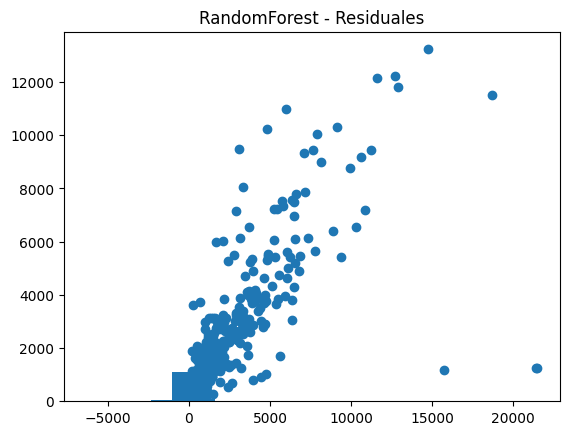

In [18]:
# Gráficas
plt.scatter(y_test, preds)
plt.title("RandomForest - Pred vs Real")
plt.savefig("graficas_RF/rf_pred_vs_real.png")

plt.hist(y_test - preds, bins=20)
plt.title("RandomForest - Residuales")
plt.savefig("graficas_RF/rf_residuals.png")